In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)


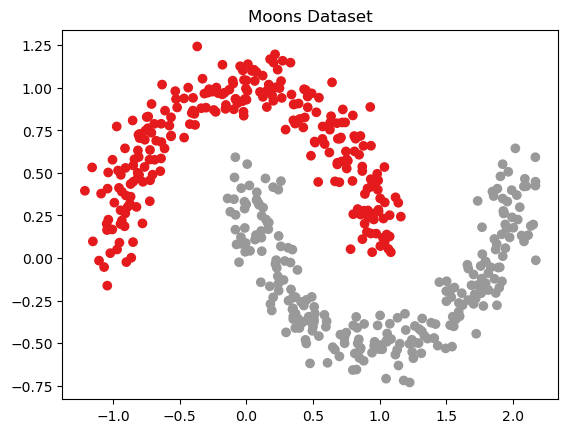

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
plt.title("Moons Dataset")
plt.show()


Polynomial kernel PCA

In [25]:
def transform_kernel(Xi,Xj,p):
    return ((Xi@(Xj.T))+ 1)**p

In [26]:
u = np.array([1,2])
v = np.array([-2,2])

In [27]:
transform_kernel(u,v,2)

9

In [28]:
X.shape

(500, 2)

In [29]:
K = np.zeros((500,500),dtype=float)

In [30]:
K

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
X_c = X - X.mean(axis=0)

In [32]:
L = X_c@(X_c.T) 

In [33]:
K = (L+1)**2

In [34]:
kernel_eig_vals,kernel_eig_vecs = np.linalg.eig(K)

In [35]:
indexes = np.argsort(kernel_eig_vals)[::-1]

In [36]:
sorted_eig_vals = kernel_eig_vals[indexes]
sorted_eig_vecs = kernel_eig_vecs[:,indexes]

In [37]:
sorted_eig_vals.shape

(500,)

In [38]:
D = np.zeros((500,500),dtype=float)

In [44]:
D

array([[0.03141259, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03471261, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0694154 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
V = sorted_eig_vecs/np.linalg.norm(sorted_eig_vecs,axis =0)

In [42]:
V

array([[-0.02622348+0.j        , -0.02523068+0.j        ,
         0.06822549+0.j        , ..., -0.00560184-0.00999537j,
        -0.00019001-0.00078354j, -0.00019001+0.00078354j],
       [-0.02197276+0.j        , -0.00433507+0.j        ,
         0.01899631+0.j        , ...,  0.00703357-0.00397755j,
        -0.01741283+0.0063394j , -0.01741283-0.0063394j ],
       [-0.03280354+0.j        , -0.03655987+0.j        ,
         0.06623088+0.j        , ..., -0.02697654-0.03235515j,
         0.01547532-0.01013546j,  0.01547532+0.01013546j],
       ...,
       [-0.02116807+0.j        , -0.00841786+0.j        ,
         0.06444088+0.j        , ..., -0.0046175 +0.03331684j,
         0.01628169+0.00933888j,  0.01628169-0.00933888j],
       [-0.05206722+0.j        , -0.05746806+0.j        ,
         0.02220609+0.j        , ..., -0.03053049-0.05690967j,
        -0.02329954-0.02053743j, -0.02329954+0.02053743j],
       [-0.02930929+0.j        ,  0.02996276+0.j        ,
         0.0344374 +0.j       

In [46]:
print(D.shape,V.shape,K.shape)

(500, 500) (500, 500) (500, 500)


In [47]:
X_reconstructed = D @ (V.T) @ K 

In [49]:
X_reconstructed.shape

(500, 500)

Centering kernel matrix

In [46]:
def centred_kernel(K):
    n = K.shape[0]
    ones = np.ones((n,n))/n
    k_cen = K - ones@K - K@ones + ones@K@ones
    return k_cen

In [47]:
K_cen  =centred_kernel(K)

In [48]:
K_cen

array([[ 1.5557525 , -0.13818483,  1.69794868, ...,  1.21809132,
         1.28726776, -0.88366104],
       [-0.13818483,  1.58482589, -0.35434803, ...,  0.03239053,
        -0.61319899,  1.29399277],
       [ 1.69794868, -0.35434803,  2.06462171, ...,  1.08543626,
         2.0629626 , -1.18907359],
       ...,
       [ 1.21809132,  0.03239053,  1.08543626, ...,  1.2419187 ,
         0.24155346, -0.50968289],
       [ 1.28726776, -0.61319899,  2.0629626 , ...,  0.24155346,
         3.34477006, -1.83579149],
       [-0.88366104,  1.29399277, -1.18907359, ..., -0.50968289,
        -1.83579149,  2.6841186 ]])

In [49]:
eigen_vals,eigen_vecs = np.linalg.eigh(K_cen)

In [50]:
inds = np.argsort(eigen_vals)[::-1]

In [51]:
sorted_eigh_vals = eigen_vals[inds]
sorted_eigh_vecs = eigen_vecs[:,inds]

In [52]:
Dc = np.zeros((500,500),dtype=float)

In [53]:
rounded_eigh = np.round(np.real(sorted_eigh_vals),5)

In [63]:
for i in range(500):
    
    Dc[i][i] = 1/((rounded_eigh[i])**0.5)

C:\Users\Nimisha Manawat\AppData\Local\Temp\ipykernel_16388\4003348773.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  Dc[i][i] = 1/((rounded_eigh[i])**0.5)


In [54]:
min_val = 1e-10

In [55]:
positive_inds = sorted_eigh_vals > min_val

In [56]:
eigen_pos = sorted_eigh_vals[positive_inds]

In [57]:
eigen_vecpos = sorted_eigh_vecs[:,positive_inds]

In [58]:
eigen_vecpos.shape

(500, 5)

In [59]:
eigen_pos.shape

(5,)

In [60]:
Dc = np.zeros((5,5),dtype=float)

In [61]:
for i in range(5):
    Dc[i][i] = 1/((eigen_pos[i])**0.5)

In [62]:
Dc

array([[0.03471261, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.05387546, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.07202913, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.10477431, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.27233926]])

In [63]:
V = eigen_vecpos/ np.linalg.norm(eigen_vecpos,axis=0)

In [64]:
V

array([[-0.02524771,  0.03805733,  0.05154176, -0.01168054,  0.0155886 ],
       [-0.00434771,  0.03708777, -0.06855697,  0.04178044,  0.04742025],
       [-0.03658416,  0.02743487,  0.0526707 , -0.04092623,  0.02323364],
       ...,
       [-0.00842942,  0.04392708,  0.04927553,  0.02340871,  0.00426978],
       [-0.05751424, -0.01786362,  0.02568641, -0.06236852, -0.02451422],
       [ 0.02994248,  0.03507688, -0.07884812, -0.04149721,  0.10927759]])

In [65]:
X_reconstructed2 = Dc @ (V.T) @ K_cen 

In [66]:
D.shape

(500, 500)

In [67]:
X_reconstructed2

array([[-0.72733531, -0.12524873, -1.05391554, ..., -0.24283457,
        -1.65686898,  0.8625823 ],
       [ 0.70639442,  0.68839815,  0.50922752, ...,  0.81534475,
        -0.3315724 ,  0.65107345],
       [ 0.71556829, -0.95179504,  0.73124167, ...,  0.68410566,
         0.35661136, -1.09466988],
       [-0.11148288,  0.39876606, -0.3906132 , ...,  0.22342035,
        -0.59526541, -0.39606278],
       [ 0.05723962,  0.17412197,  0.08531139, ...,  0.01567816,
        -0.09001353,  0.40125536]])

In [68]:
X_reconstructed2.shape

(5, 500)

In [69]:
X_Pca = X_reconstructed2.T

In [82]:
X_Pca.shape

(500, 5)

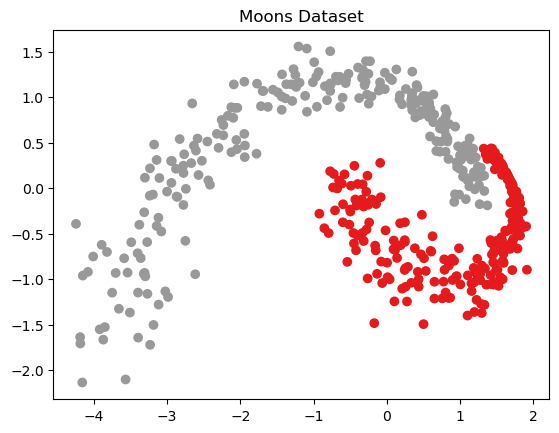

In [89]:
plt.scatter(X_Pca[:,0], X_Pca[:,1],c=y, cmap=plt.cm.Set1)
plt.title("Moons Dataset")
plt.show()

Let's try Gaussian kernel 

In [77]:
def compute_diagonal_mat(eigen_vals):
    n = eigen_vals.shape[0]
    D = np.zeros((n,n),dtype=float)
    for i in range(n):
        D[i][i] = 1/ ((eigen_vals[i])**0.5)
    return D

In [78]:
def compute_V(eigen_vecs):
    V = eigen_vecs / np.linalg.norm(eigen_vecs,axis=0)
    return V 

In [79]:
def Poly_kernel(X,degree=None):
    if degree is None:
        degree = 2 
    K = transform_kernel(X,X,degree)
    K_cen = centred_kernel(K)
    eigen_vals,eigen_vecs = np.linalg.eigh(K_cen)
    thresh_val = 1e-10
    inxs = eigen_vals>thresh_val
    new_eigen_vals = eigen_vals[inxs]
    new_eigen_vecs = eigen_vecs[:,inxs]
    indexes_sort = np.argsort(new_eigen_vals)
    sorted_eigen_vals = new_eigen_vals[indexes_sort]
    sorted_eigen_vecs = new_eigen_vecs[:,indexes_sort]

    D = compute_diagonal_mat(sorted_eigen_vals)
    V = compute_V(sorted_eigen_vecs)

    return D @(V.T)@K_cen
    

In [100]:
X2, y2 = make_moons(n_samples=600, noise=0.1, random_state=42)

In [101]:
X2_rec = Poly_kernel(X2,3)

In [102]:
X2_rec.shape

(9, 600)

In [103]:
X2_new = X2_rec.T

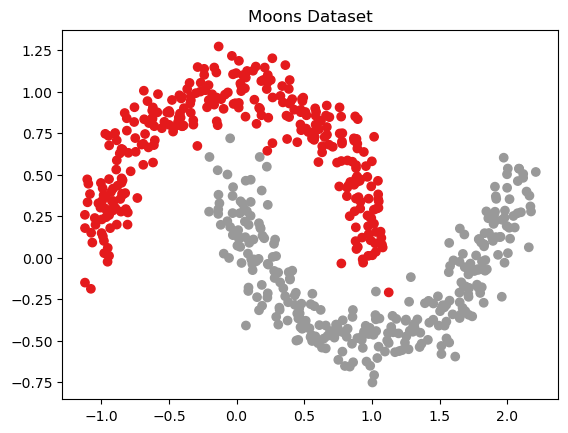

In [104]:
plt.scatter(X2[:,0], X2[:,1],c=y2, cmap=plt.cm.Set1)
plt.title("Moons Dataset")
plt.show()

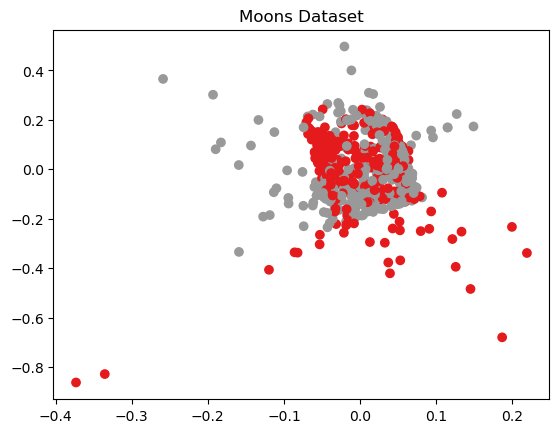

In [105]:
plt.scatter(X2_new[:,0], X2_new[:,1],c=y2, cmap=plt.cm.Set1)
plt.title("Moons Dataset")
plt.show()

In [74]:
from sklearn.datasets import make_circles

In [83]:
X3,y3 = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

In [84]:
new_X3 = Poly_kernel(X3)

In [85]:
X3_pca = new_X3.T

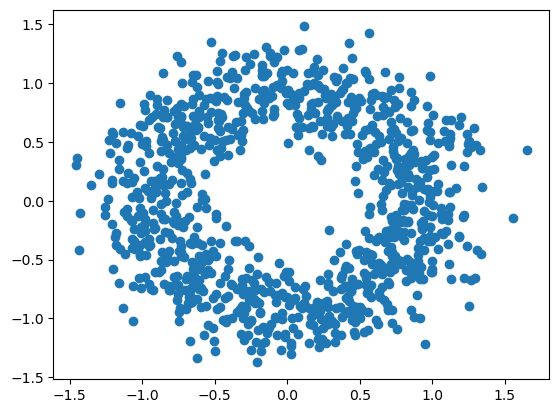

In [86]:
plt.scatter(X3[:, 0], X3[:, 1])
plt.show()

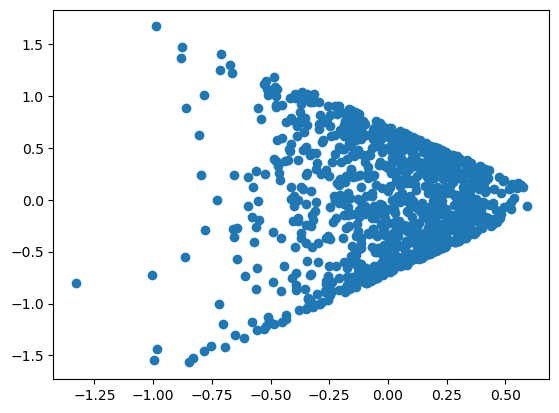

In [107]:
plt.scatter(X3_pca[:, 0], X3_pca[:, 1])
plt.show()

In [88]:
def gaussian_kernel(X,y,s):
    return np.exp(-(np.linalg.norm(X-y)**2)/(2*(s**2)))
    

In [89]:
def RBF_kernel_mat(X,sigma):
    n = X.shape[0]
    K = np.zeros((n,n),dtype=float)
    for i in range(n):
        for j in range(n):
            K[i][j] = gaussian_kernel(X[i],X[j],sigma)
    return K 

In [90]:
def RBF_kernel(X,sigma=None):
    if sigma is None:
        sigma =0.1 
    K = RBF_kernel_mat(X,sigma)
    K_cen = centred_kernel(K)
    eigen_vals,eigen_vecs = np.linalg.eigh(K_cen)
    thresh_val = 1e-10
    inxs = eigen_vals>thresh_val
    new_eigen_vals = eigen_vals[inxs]
    new_eigen_vecs = eigen_vecs[:,inxs]
    indexes_sort = np.argsort(new_eigen_vals)
    sorted_eigen_vals = new_eigen_vals[indexes_sort]
    sorted_eigen_vecs = new_eigen_vecs[:,indexes_sort]

    

    D = compute_diagonal_mat(sorted_eigen_vals)
    V = compute_V(sorted_eigen_vecs)

    return D @(V.T)@K_cen
    

In [91]:
X3_RBf = RBF_kernel(X3,2)

In [92]:
X3_RBf.shape

(47, 1000)

In [93]:
X3_rec = X3_RBf.T

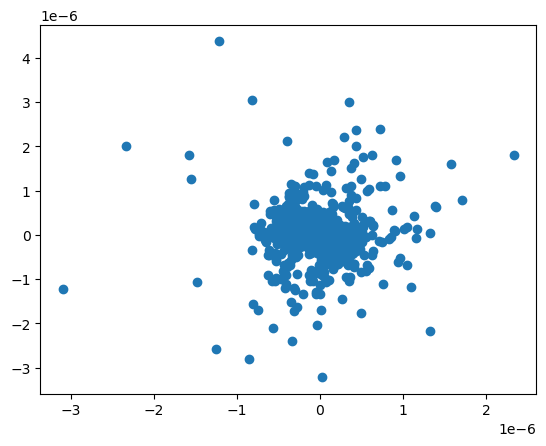

In [97]:
plt.scatter(X3_rec[:, 0], X3_rec[:, 1])
plt.show()